# Research Question: Is it possible to predict whether or not the arrest will be made?

# Importing Libraries

In [123]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2


In [124]:
#a = pd.read_csv('Crimes_-_2001_to_Present.csv')
#a.head()

In [125]:
#a.shape

Let's focus on data from 2015 to 2021 only

In [126]:
#a= a[a.Year>=2015]
#a= a[a.Year<=2021]
#a.shape

In [127]:
#a.head()

In [128]:
#a.shape

In [129]:
#a.to_csv('crime15-21.csv') 

# Loading 2015 TO 2021 dataset

In [130]:
a = pd.read_csv('crime15-21.csv')
a.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [131]:
a.shape

(1749922, 23)

# Data Understanding and Cleaning

In [132]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749922 entries, 0 to 1749921
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [133]:
a.isnull().sum()

Unnamed: 0                  0
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     7332
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       42
Community Area              1
FBI Code                    0
X Coordinate            25678
Y Coordinate            25678
Year                        0
Updated On                  0
Latitude                25678
Longitude               25678
Location                25678
dtype: int64

In [134]:
percent_missing = a.isnull().sum() * 100 / len(a)
missing_value = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value

,percent_missing
Unnamed: 0,0.000000
ID,0.000000
Case Number,0.000000
Date,0.000000
Block,0.000000
IUCR,0.000000
Primary Type,0.000000
Description,0.000000
Location Description,0.418990
Arrest,0.000000


In [135]:
np.count_nonzero(a.isnull())

135766

In [136]:
a.dropna(how='any', axis=0, inplace=True) 

In [137]:
a.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [138]:
a.shape

(1719211, 23)

Droping Column not useful for analysis

1. Unnamed: 0  
2. Block
3. ID
4. Case Number
5. IUCR, which is "Crime Reporting (IUCR) Codes" and is already explained by the "Primary Type" and "Description"
6. FBI Code
7. X coordinate
8. Y coordinate
8. Updated On


In [139]:
a=a.drop(['Unnamed: 0','Block','ID', 'Case Number','IUCR','FBI Code', 'X Coordinate', 'Y Coordinate','Updated On'], axis=1)
a

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Location
0,09/05/2015 01:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,2015,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,09/04/2015 11:30:00 AM,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,2015,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,09/05/2015 12:45:00 PM,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,2015,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,09/05/2015 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,2015,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,09/05/2015 10:55:00 AM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,2015,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749814,04/02/2021 08:47:00 AM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,VEHICLE NON-COMMERCIAL,True,False,925,9.0,3.0,37.0,2021,41.814283,-87.633512,"(41.814283318, -87.633511983)"
1749815,04/12/2021 12:00:00 AM,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,2413,24.0,40.0,2.0,2021,41.992177,-87.682330,"(41.992177267, -87.682330297)"
1749816,12/31/2021 08:55:00 AM,ARSON,BY FIRE,RESIDENCE - PORCH / HALLWAY,False,True,1132,11.0,24.0,26.0,2021,41.870736,-87.724076,"(41.870735748, -87.724075964)"
1749840,12/11/2019 04:16:00 AM,ARSON,BY FIRE,RESIDENCE - PORCH / HALLWAY,True,False,2213,22.0,21.0,73.0,2019,41.720263,-87.657672,"(41.720262872, -87.657672055)"


Exploring Location Column

In [140]:
#exploring location column
a['Location']

0          (41.815117282, -87.669999562)
1          (41.895080471, -87.765400451)
3          (41.937405765, -87.716649687)
4          (41.881903443, -87.755121152)
5          (41.744378879, -87.658430635)
                       ...              
1749814    (41.814283318, -87.633511983)
1749815    (41.992177267, -87.682330297)
1749816    (41.870735748, -87.724075964)
1749840    (41.720262872, -87.657672055)
1749898    (41.982402819, -87.660034754)
Name: Location, Length: 1719211, dtype: object

In [141]:
a=a.drop(['Location'], axis=1)
a.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
0,09/05/2015 01:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,2015,41.815117,-87.670000
1,09/04/2015 11:30:00 AM,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,2015,41.895080,-87.765400
3,09/05/2015 12:45:00 PM,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,2015,41.937406,-87.716650
4,09/05/2015 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,2015,41.881903,-87.755121
5,09/05/2015 10:55:00 AM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,2015,41.744379,-87.658431


# Outlier Check

Text(0.5, 1.0, 'Boxplot of Latitude ')

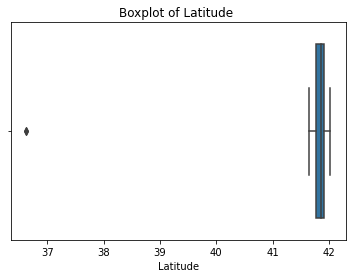

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=a,x=a["Latitude"])
plt.title("Boxplot of Latitude ")

In [143]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = a.index[(df[ft]< lower_bound) | (df[ft]> upper_bound)]
    
    return ls

In [144]:
index_list = []
for feature in ['Latitude', 'Longitude']:
 index_list.extend(outliers(a, feature))

In [145]:
index_list

[1110568,
 1116717,
 916,
 1278,
 1409,
 1490,
 2075,
 2099,
 2110,
 2120,
 2124,
 2180,
 2211,
 2296,
 3030,
 3261,
 3320,
 3642,
 3905,
 4364,
 4424,
 4437,
 4534,
 4542,
 5167,
 5842,
 5898,
 5903,
 5919,
 5922,
 6116,
 6961,
 7031,
 7539,
 7838,
 8301,
 9084,
 9091,
 9196,
 9269,
 9274,
 9578,
 10054,
 10510,
 10654,
 10656,
 10779,
 11516,
 11526,
 11597,
 11802,
 11822,
 11929,
 12480,
 12629,
 13237,
 13596,
 13789,
 13946,
 13949,
 13952,
 13969,
 14084,
 14442,
 14794,
 15534,
 15719,
 17585,
 17836,
 18654,
 18658,
 18703,
 18712,
 18722,
 18741,
 18773,
 18788,
 18821,
 19080,
 19271,
 19406,
 19408,
 19411,
 19416,
 19433,
 19440,
 19449,
 19606,
 19699,
 20003,
 20139,
 20144,
 20161,
 20258,
 20281,
 20286,
 20892,
 21635,
 21738,
 21924,
 22921,
 22958,
 22973,
 23039,
 23613,
 23676,
 23689,
 23916,
 24428,
 24451,
 25122,
 25133,
 25167,
 25169,
 25420,
 25481,
 25900,
 26293,
 26299,
 26310,
 27112,
 27239,
 27241,
 27272,
 27298,
 27327,
 27595,
 27862,
 27906,
 2791

In [146]:
def remove (df,ls):
    ls =sorted(set(ls))
    df = a.drop(ls)
    return df

In [147]:
a= remove(a, index_list)

In [148]:
print('Current rows:', a.shape[0])
print('Rows after removing out of box points:', a.shape[0])

Current rows: 1710193
Rows after removing out of box points: 1710193


Converting Date Column into seprate column of Year, Month, DayOfWeek and Hour

In [149]:
print('Range of dates: {} to {}'.format(a.Date.min(), a.Date.max()))

Range of dates: 01/01/2015 01:00:00 AM to 12/31/2021 12:55:00 AM


In [150]:
print('Range of year: {} to {}'.format(a.Year.min(), a.Year.max()))

Range of year: 2015 to 2021


In [151]:
a.Year.nunique()

7

In [152]:
#we'll create some new columns like month, dayOfWeek, dayOfMonth, weekOfMonth(wom)

a.Date=pd.to_datetime(a.Date,format='%m/%d/%Y %I:%M:%S %p')

a['year']=a['Date'].dt.year
a['month']=a['Date'].dt.month
a['dayOfWeek'] = a['Date'].dt.dayofweek
a['hour']=a['Date'].dt.hour

a.head()




,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,year,month,dayOfWeek,hour
0,2015-09-05 13:30:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,2015,41.815117,-87.670000,2015,9,5,13
1,2015-09-04 11:30:00,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,2015,41.895080,-87.765400,2015,9,4,11
3,2015-09-05 12:45:00,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,2015,41.937406,-87.716650,2015,9,5,12
4,2015-09-05 13:00:00,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,2015,41.881903,-87.755121,2015,9,5,13
5,2015-09-05 10:55:00,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,2015,41.744379,-87.658431,2015,9,5,10


In [153]:
a=a.drop(['Date', 'Year'],axis=1)
a

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,year,month,dayOfWeek,hour
0,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,41.815117,-87.670000,2015,9,5,13
1,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,9,4,11
3,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,9,5,12
4,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,9,5,13
5,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,41.744379,-87.658431,2015,9,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749814,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,VEHICLE NON-COMMERCIAL,True,False,925,9.0,3.0,37.0,41.814283,-87.633512,2021,4,4,8
1749815,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,2413,24.0,40.0,2.0,41.992177,-87.682330,2021,4,0,0
1749816,ARSON,BY FIRE,RESIDENCE - PORCH / HALLWAY,False,True,1132,11.0,24.0,26.0,41.870736,-87.724076,2021,12,4,8
1749840,ARSON,BY FIRE,RESIDENCE - PORCH / HALLWAY,True,False,2213,22.0,21.0,73.0,41.720263,-87.657672,2019,12,2,4


Exploring Domestic Column

In [154]:
a.Domestic.value_counts()

False    1412757
True      297436
Name: Domestic, dtype: int64

Converting Domestic to interger type

In [155]:
a.Domestic = a.Domestic.astype(int)
a.Domestic.value_counts()


0    1412757
1     297436
Name: Domestic, dtype: int64

In [156]:
a.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,year,month,dayOfWeek,hour
0,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,1,924,9.0,12.0,61.0,41.815117,-87.670000,2015,9,5,13
1,THEFT,POCKET-PICKING,CTA BUS,False,0,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,9,4,11
3,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,0,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,9,5,12
4,ASSAULT,SIMPLE,APARTMENT,False,1,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,9,5,13
5,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,0,614,6.0,21.0,71.0,41.744379,-87.658431,2015,9,5,10


Exploring Arrest Column

Arrest is Our Target Variable i.e Dependent Variable

In [157]:
a.Arrest.value_counts()

False    1373134
True      337059
Name: Arrest, dtype: int64

Converting Arrest Values to interger type

In [158]:
#a.Arrest = a.Arrest.astype(int)
#a.Arrest.value_counts()

Renaming the columns like Location Description to Location, Primary Type to Primary_type, Community Area to Community_Area

In [159]:
a.rename(columns={'Location Description': 'Location', 'Primary Type':'Primary_type', 'Community Area': 'Community_Area'}, inplace=True)
a.head()

,Primary_type,Description,Location,Arrest,Domestic,Beat,District,Ward,Community_Area,Latitude,Longitude,year,month,dayOfWeek,hour
0,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,1,924,9.0,12.0,61.0,41.815117,-87.670000,2015,9,5,13
1,THEFT,POCKET-PICKING,CTA BUS,False,0,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,9,4,11
3,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,0,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,9,5,12
4,ASSAULT,SIMPLE,APARTMENT,False,1,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,9,5,13
5,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,0,614,6.0,21.0,71.0,41.744379,-87.658431,2015,9,5,10


Exploring Location Column

In [160]:
print(a["Location"].nunique())
list(a["Location"].unique())

193


['RESIDENCE',
 'CTA BUS',
 'SIDEWALK',
 'APARTMENT',
 'RESIDENCE-GARAGE',
 'GROCERY FOOD STORE',
 'STREET',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'SMALL RETAIL STORE',
 'OTHER',
 'VEHICLE NON-COMMERCIAL',
 'RESTAURANT',
 'RESIDENCE PORCH/HALLWAY',
 'ALLEY',
 'LIBRARY',
 'ATHLETIC CLUB',
 'DRUG STORE',
 'PARK PROPERTY',
 'CHA PARKING LOT/GROUNDS',
 'NURSING HOME/RETIREMENT HOME',
 'DRIVEWAY - RESIDENTIAL',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'COMMERCIAL / BUSINESS OFFICE',
 'DEPARTMENT STORE',
 'HOTEL/MOTEL',
 'GAS STATION',
 'BAR OR TAVERN',
 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP',
 'SPORTS ARENA/STADIUM',
 'CONSTRUCTION SITE',
 'HOSPITAL BUILDING/GROUNDS',
 'CTA STATION',
 'TAVERN/LIQUOR STORE',
 'CHA HALLWAY/STAIRWELL/ELEVATOR',
 'CONVENIENCE STORE',
 'WAREHOUSE',
 'VACANT LOT/LAND',
 'CTA BUS STOP',
 'CHA APARTMENT',
 'TAXICAB',
 'CTA TRAIN',
 'APPLIANCE STORE',
 'BARBERSHOP',
 'BANK',
 'SCHOOL, PUBLIC, GROUNDS',
 'FACTORY/MANUFACTURING BUILDING',
 'CAR WASH',
 'CTA GARAGE / OTHER PROPERT

Exploring Description Column

In [161]:
print(a["Description"].nunique())
list(a["Description"].unique())

495


['DOMESTIC BATTERY SIMPLE',
 'POCKET-PICKING',
 'POSS: HEROIN(BRN/TAN)',
 'SIMPLE',
 'FORCIBLE ENTRY',
 'UNLAWFUL ENTRY',
 'RETAIL THEFT',
 'STRONGARM - NO WEAPON',
 '$500 AND UNDER',
 'TELEPHONE THREAT',
 'OVER $500',
 'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON',
 'TO VEHICLE',
 'TO PROPERTY',
 'ARMED: HANDGUN',
 'FROM BUILDING',
 'AGGRAVATED: OTHER DANG WEAPON',
 'HARASSMENT BY TELEPHONE',
 'OTHER VEHICLE OFFENSE',
 'PAROLE VIOLATION',
 'POSS: CANNABIS 30GMS OR LESS',
 'UNLAWFUL USE OTHER DANG WEAPON',
 'POSS FIREARM/AMMO:NO FOID CARD',
 'COUNTERFEIT CHECK',
 'MANU/DELIVER: HEROIN (WHITE)',
 'UNLAWFUL POSS OTHER FIREARM',
 'UNLAWFUL USE HANDGUN',
 'TO LAND',
 'AUTOMOBILE',
 'HARASSMENT BY ELECTRONIC MEANS',
 'FRAUD OR CONFIDENCE GAME',
 'POSS: CRACK',
 'AGGRAVATED:KNIFE/CUTTING INSTR',
 'ATTEMPT THEFT',
 'SOLICIT NARCOTICS ON PUBLICWAY',
 'POSS: HEROIN(WHITE)',
 'PUBLIC INDECENCY',
 'MANU/DELIVER:CRACK',
 'AGGRAVATED: HANDGUN',
 'RESIST/OBSTRUCT/DISARM OFFICER',
 'FINANCIAL IDEN

Exploring Primary_type Column

In [162]:
print(a["Primary_type"].nunique())
list(a["Primary_type"].unique())

35


['BATTERY',
 'THEFT',
 'NARCOTICS',
 'ASSAULT',
 'BURGLARY',
 'ROBBERY',
 'OTHER OFFENSE',
 'CRIMINAL DAMAGE',
 'WEAPONS VIOLATION',
 'DECEPTIVE PRACTICE',
 'CRIMINAL TRESPASS',
 'MOTOR VEHICLE THEFT',
 'SEX OFFENSE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'OFFENSE INVOLVING CHILDREN',
 'PUBLIC PEACE VIOLATION',
 'PROSTITUTION',
 'GAMBLING',
 'CRIM SEXUAL ASSAULT',
 'LIQUOR LAW VIOLATION',
 'ARSON',
 'STALKING',
 'KIDNAPPING',
 'INTIMIDATION',
 'CONCEALED CARRY LICENSE VIOLATION',
 'NON - CRIMINAL',
 'HUMAN TRAFFICKING',
 'OBSCENITY',
 'CRIMINAL SEXUAL ASSAULT',
 'PUBLIC INDECENCY',
 'OTHER NARCOTIC VIOLATION',
 'NON-CRIMINAL',
 'HOMICIDE',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'RITUALISM']

# Exploratory Data Analysis

Bar graph for top 10 crime location

In [163]:
by_location = a.Location.value_counts()
top_10_location = by_location[:10]
top_10_location

STREET                            397799
RESIDENCE                         285523
APARTMENT                         248253
SIDEWALK                          138092
OTHER                              54421
SMALL RETAIL STORE                 42835
PARKING LOT/GARAGE(NON.RESID.)     39346
RESTAURANT                         38740
ALLEY                              35531
VEHICLE NON-COMMERCIAL             29078
Name: Location, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Location'>

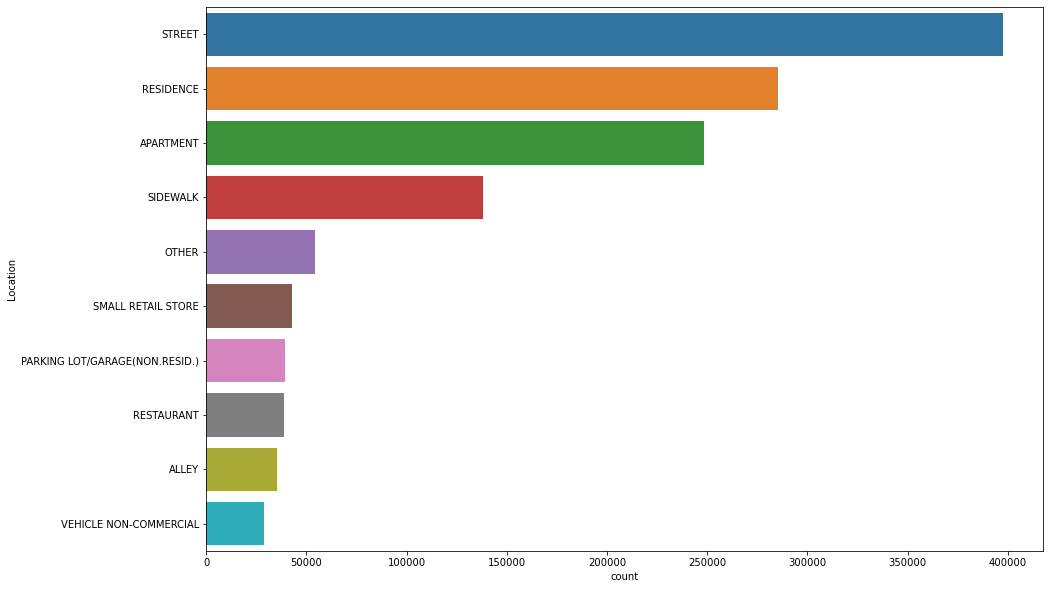

In [164]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location', data = a, order = a['Location'].value_counts().iloc[:10].index)

Bar graph for top 10 crime type

In [165]:
by_type = a.Primary_type.value_counts()
top_10_type = by_type[:10]
top_10_type

THEFT                  383686
BATTERY                328111
CRIMINAL DAMAGE        191868
ASSAULT                133933
DECEPTIVE PRACTICE     112455
OTHER OFFENSE          110545
NARCOTICS               84882
BURGLARY                76916
MOTOR VEHICLE THEFT     71474
ROBBERY                 66855
Name: Primary_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Primary_type'>

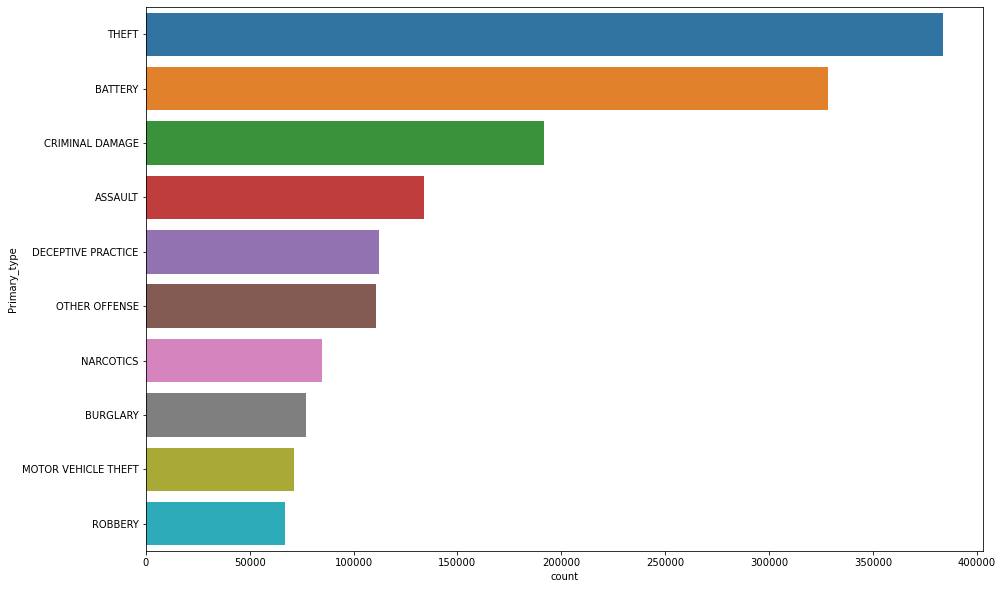

In [166]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary_type', data = a, order = a['Primary_type'].value_counts().iloc[:10].index)

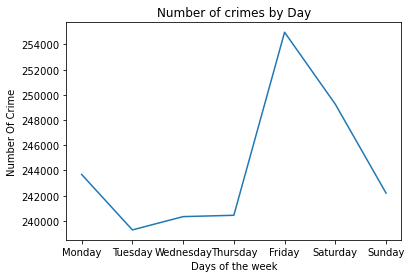

In [167]:
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
a.groupby([a.dayOfWeek]).size().plot(kind='line')
plt.ylabel('Number Of Crime')
plt.xticks(np.arange(7), day)
plt.xlabel('Days of the week')
plt.title('Number of crimes by Day')
plt.show()

In [168]:
a.dayOfWeek.value_counts()

4    254969
5    249261
0    243684
6    242208
3    240446
2    240340
1    239285
Name: dayOfWeek, dtype: int64

Bar Graph for most number of crime in a Month

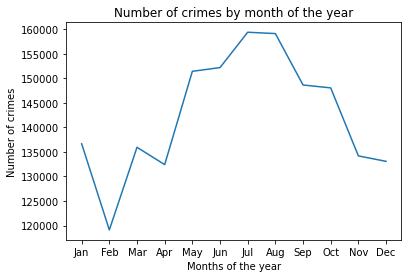

In [169]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
values = a.groupby([a.month]).size()
plt.plot(months, values)
plt.xlabel('Months of the year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.savefig("crimesbymonth.png",dpi=800) 
plt.show()

In [170]:
a.month.value_counts()

7     159389
8     159117
6     152186
5     151424
9     148643
10    148049
1     136653
3     135946
11    134189
12    133083
4     132409
2     119105
Name: month, dtype: int64

Percentage of arrest

In [171]:
# Convert values into percentages
arrest = a['Arrest'].value_counts()
arrest_percent = (arrest/ a['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

<AxesSubplot:ylabel='% of Arrests'>

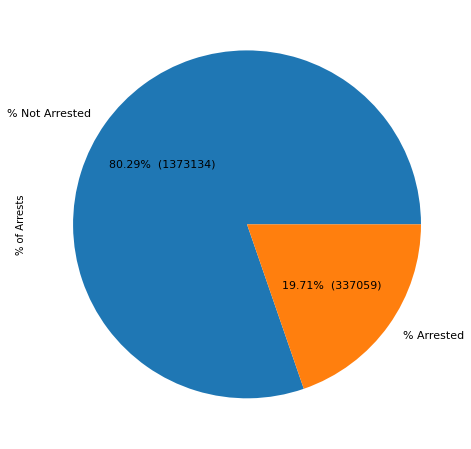

In [172]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(a['Arrest'].value_counts()),
                       figsize=(8, 8))

In [173]:
## Group dataset by year and arrests
arrest_per_year = a.groupby('year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
year,,,
2015,False,189255,73.812402
2015,True,67145,26.187598
2016,False,212635,80.237503
2016,True,52372,19.762497
2017,False,210952,80.287120
2017,True,51795,19.712880
2018,False,208891,79.886418
2018,True,52594,20.113582
2019,False,201048,78.315337


<AxesSubplot:title={'center':'Percentages of successful arrests from 2015 to 2021'}, xlabel='year', ylabel='Successful Arrest Percentage'>

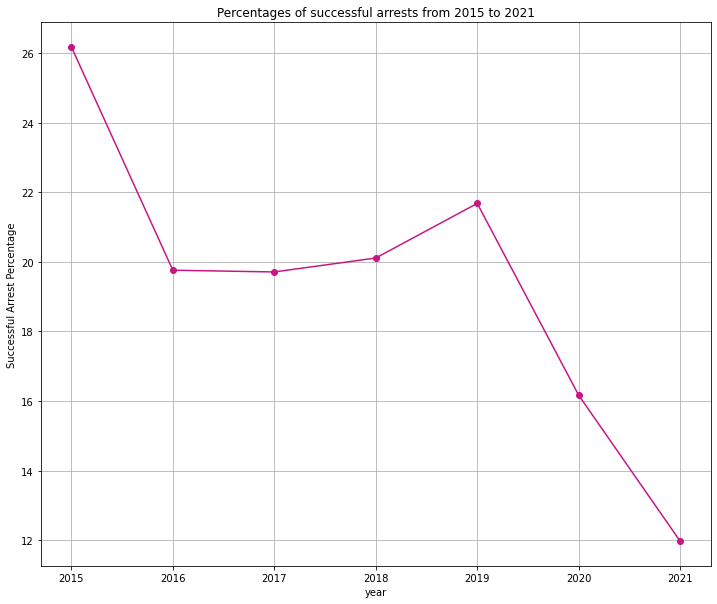

In [174]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2015 to 2021')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')

In [175]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
a['Arrest']= label_encoder.fit_transform(a['Arrest'])
 
a['Arrest'].unique()

array([0, 1], dtype=int64)

# Feature Engineering

Checking for Categorical Columns

In [176]:
categorical_columns= a.select_dtypes(include="object").columns
categorical_columns

Index(['Primary_type', 'Description', 'Location'], dtype='object')

To check the association between categorical values we will use chi-square test of independence

Checking relationship between primary type and location

H0= There is no relationship between teo variables/columns/attributes

HA= There is a relationship between two variables/columns/attributes

In [177]:
dataset_table=pd.crosstab(a['Primary_type'],a['Arrest'])
print(dataset_table)


Arrest                                  0      1
Primary_type                                    
ARSON                                2955    308
ASSAULT                            111802  22131
BATTERY                            263299  64812
BURGLARY                            72980   3936
CONCEALED CARRY LICENSE VIOLATION      21    639
CRIM SEXUAL ASSAULT                  5847    579
CRIMINAL DAMAGE                    181239  10629
CRIMINAL SEXUAL ASSAULT              3326    248
CRIMINAL TRESPASS                   18197  21682
DECEPTIVE PRACTICE                 107640   4815
GAMBLING                                2   1069
HOMICIDE                             3048   1625
HUMAN TRAFFICKING                      68      5
INTERFERENCE WITH PUBLIC OFFICER      372   6756
INTIMIDATION                          919     88
KIDNAPPING                           1048     81
LIQUOR LAW VIOLATION                    2   1527
MOTOR VEHICLE THEFT                 66605   4869
NARCOTICS           

In [178]:
dataset_table.values 

array([[  2955,    308],
       [111802,  22131],
       [263299,  64812],
       [ 72980,   3936],
       [    21,    639],
       [  5847,    579],
       [181239,  10629],
       [  3326,    248],
       [ 18197,  21682],
       [107640,   4815],
       [     2,   1069],
       [  3048,   1625],
       [    68,      5],
       [   372,   6756],
       [   919,     88],
       [  1048,     81],
       [     2,   1527],
       [ 66605,   4869],
       [   172,  84710],
       [    19,      6],
       [   115,      9],
       [     4,      2],
       [    91,    320],
       [ 12653,   1971],
       [    14,     21],
       [ 88217,  22328],
       [     5,   4618],
       [     0,     72],
       [  3526,   6579],
       [     1,      0],
       [ 61556,   5299],
       [  5904,   1099],
       [  1309,    159],
       [347444,  36242],
       [ 12734,  27825]], dtype=int64)

In [179]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[  2955    308]
 [111802  22131]
 [263299  64812]
 [ 72980   3936]
 [    21    639]
 [  5847    579]
 [181239  10629]
 [  3326    248]
 [ 18197  21682]
 [107640   4815]
 [     2   1069]
 [  3048   1625]
 [    68      5]
 [   372   6756]
 [   919     88]
 [  1048     81]
 [     2   1527]
 [ 66605   4869]
 [   172  84710]
 [    19      6]
 [   115      9]
 [     4      2]
 [    91    320]
 [ 12653   1971]
 [    14     21]
 [ 88217  22328]
 [     5   4618]
 [     0     72]
 [  3526   6579]
 [     1      0]
 [ 61556   5299]
 [  5904   1099]
 [  1309    159]
 [347444  36242]
 [ 12734  27825]]


In [180]:
val=stats.chi2_contingency(dataset_table)

In [181]:
val

(601003.8423100983,
 0.0,
 34,
 array([[2.61990094e+03, 6.43099064e+02],
        [1.07536375e+05, 2.63966249e+04],
        [2.63444167e+05, 6.46668332e+04],
        [6.17567577e+04, 1.51592423e+04],
        [5.29921734e+02, 1.30078266e+02],
        [5.15951070e+03, 1.26648930e+03],
        [1.54053066e+05, 3.78149345e+04],
        [2.86960648e+03, 7.04393519e+02],
        [3.20193164e+04, 7.85968359e+03],
        [9.02914373e+04, 2.21635627e+04],
        [8.59918450e+02, 2.11081550e+02],
        [3.75200646e+03, 9.20993541e+02],
        [5.86125554e+01, 1.43874446e+01],
        [5.72315473e+03, 1.40484527e+03],
        [8.08532100e+02, 1.98467900e+02],
        [9.06487330e+02, 2.22512670e+02],
        [1.22765202e+03, 3.01347983e+02],
        [5.73873121e+04, 1.40866879e+04],
        [6.81527525e+04, 1.67292475e+04],
        [2.00727930e+01, 4.92720705e+00],
        [9.95610531e+01, 2.44389469e+01],
        [4.81747031e+00, 1.18252969e+00],
        [3.29996716e+02, 8.10032838e+01],
   

In [182]:
Expected_Values=val[3]

In [183]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [184]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [185]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 601003.8423100985


In [186]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [187]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1


In [188]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


There is a relationship between Primary_type and Location therefore dropping one attribute

In [189]:
a=a.drop(['Location'], axis=1)
a.head()

,Primary_type,Description,Arrest,Domestic,Beat,District,Ward,Community_Area,Latitude,Longitude,year,month,dayOfWeek,hour
0,BATTERY,DOMESTIC BATTERY SIMPLE,0,1,924,9.0,12.0,61.0,41.815117,-87.670000,2015,9,5,13
1,THEFT,POCKET-PICKING,0,0,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,9,4,11
3,NARCOTICS,POSS: HEROIN(BRN/TAN),1,0,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,9,5,12
4,ASSAULT,SIMPLE,0,1,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,9,5,13
5,BURGLARY,FORCIBLE ENTRY,0,0,614,6.0,21.0,71.0,41.744379,-87.658431,2015,9,5,10


Checking relationship between primary type and location

H0= There is no relationship between teo variables/columns/attributes

HA= There is a relationship between two variables/columns/attributes

In [190]:
dataset_table=pd.crosstab(a['Primary_type'],a['Description'])
print(dataset_table)

Description                        $500 AND UNDER  \
Primary_type                                        
ARSON                                           0   
ASSAULT                                         0   
BATTERY                                         0   
BURGLARY                                        0   
CONCEALED CARRY LICENSE VIOLATION               0   
CRIM SEXUAL ASSAULT                             0   
CRIMINAL DAMAGE                                 0   
CRIMINAL SEXUAL ASSAULT                         0   
CRIMINAL TRESPASS                               0   
DECEPTIVE PRACTICE                              0   
GAMBLING                                        0   
HOMICIDE                                        0   
HUMAN TRAFFICKING                               0   
INTERFERENCE WITH PUBLIC OFFICER                0   
INTIMIDATION                                    0   
KIDNAPPING                                      0   
LIQUOR LAW VIOLATION                          

In [191]:
dataset_table.values 

array([[     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [151980,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0]], dtype=int64)

In [192]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]
 ...
 [     0      0      0 ...      0      0      0]
 [151980      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      0]]


In [193]:
val=stats.chi2_contingency(dataset_table)

In [194]:
val

(51806339.59017413,
 0.0,
 16796,
 array([[2.89973553e+02, 4.00674076e-02, 1.01122505e-01, ...,
         4.31201625e-01, 2.15600812e-01, 1.08754392e-01],
        [1.19022457e+04, 1.64460561e+00, 4.15067130e+00, ...,
         1.76990889e+01, 8.84954447e+00, 4.46392951e+00],
        [2.91582937e+04, 4.02897860e+00, 1.01683746e+01, ...,
         4.33594840e+01, 2.16797420e+01, 1.09357991e+01],
        ...,
        [1.30456995e+02, 1.80260357e-02, 4.54942805e-02, ...,
         1.93994479e-01, 9.69972395e-02, 4.89278111e-02],
        [3.40970863e+04, 4.71140158e+00, 1.18906802e+01, ...,
         5.07036551e+01, 2.53518275e+01, 1.27880900e+01],
        [3.60436326e+03, 4.98036771e-01, 1.25694995e+00, ...,
         5.35982430e+00, 2.67991215e+00, 1.35181409e+00]]))

In [195]:
Expected_Values=val[3]

In [196]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [197]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [198]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 525740.1339453197


In [199]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [200]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1


In [201]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [202]:
a.head()

,Primary_type,Description,Arrest,Domestic,Beat,District,Ward,Community_Area,Latitude,Longitude,year,month,dayOfWeek,hour
0,BATTERY,DOMESTIC BATTERY SIMPLE,0,1,924,9.0,12.0,61.0,41.815117,-87.670000,2015,9,5,13
1,THEFT,POCKET-PICKING,0,0,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,9,4,11
3,NARCOTICS,POSS: HEROIN(BRN/TAN),1,0,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,9,5,12
4,ASSAULT,SIMPLE,0,1,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,9,5,13
5,BURGLARY,FORCIBLE ENTRY,0,0,614,6.0,21.0,71.0,41.744379,-87.658431,2015,9,5,10


There is a relationship between them therefore dropping one attribute

In [203]:
a=a.drop(['Description'], axis=1)
a.head()

,Primary_type,Arrest,Domestic,Beat,District,Ward,Community_Area,Latitude,Longitude,year,month,dayOfWeek,hour
0,BATTERY,0,1,924,9.0,12.0,61.0,41.815117,-87.670000,2015,9,5,13
1,THEFT,0,0,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,9,4,11
3,NARCOTICS,1,0,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,9,5,12
4,ASSAULT,0,1,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,9,5,13
5,BURGLARY,0,0,614,6.0,21.0,71.0,41.744379,-87.658431,2015,9,5,10


Performing One hot encoding for top 10 primary type

In [204]:
pd.get_dummies(a, drop_first=True).shape

(1710193, 46)

In [205]:
top_10=[x for x in a.Primary_type.value_counts().sort_values(ascending=False).head(10).index]
top_10

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'ASSAULT',
 'DECEPTIVE PRACTICE',
 'OTHER OFFENSE',
 'NARCOTICS',
 'BURGLARY',
 'MOTOR VEHICLE THEFT',
 'ROBBERY']

In [206]:
for label in top_10:
    a[label]= np.where(a['Primary_type']==label,1,0)
    
a[['Primary_type']+top_10].head(40)

,Primary_type,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,DECEPTIVE PRACTICE,OTHER OFFENSE,NARCOTICS,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY
0,BATTERY,0,1,0,0,0,0,0,0,0,0
1,THEFT,1,0,0,0,0,0,0,0,0,0
3,NARCOTICS,0,0,0,0,0,0,1,0,0,0
4,ASSAULT,0,0,0,1,0,0,0,0,0,0
5,BURGLARY,0,0,0,0,0,0,0,1,0,0
6,BURGLARY,0,0,0,0,0,0,0,1,0,0
7,THEFT,1,0,0,0,0,0,0,0,0,0
8,ROBBERY,0,0,0,0,0,0,0,0,0,1
10,THEFT,1,0,0,0,0,0,0,0,0,0
11,BATTERY,0,1,0,0,0,0,0,0,0,0


In [207]:
def one_hot_top_x(df, variable,top_x_labels):
    for label in top_x_labels:
       a[variable+'_'+label]= np.where(a[variable]==label,1,0)
        
one_hot_top_x(a, 'Primary_type', top_10)
a.head()

,Primary_type,Arrest,Domestic,Beat,District,Ward,Community_Area,Latitude,Longitude,year,...,Primary_type_THEFT,Primary_type_BATTERY,Primary_type_CRIMINAL DAMAGE,Primary_type_ASSAULT,Primary_type_DECEPTIVE PRACTICE,Primary_type_OTHER OFFENSE,Primary_type_NARCOTICS,Primary_type_BURGLARY,Primary_type_MOTOR VEHICLE THEFT,Primary_type_ROBBERY
0,BATTERY,0,1,924,9.0,12.0,61.0,41.815117,-87.670000,2015,...,0,1,0,0,0,0,0,0,0,0
1,THEFT,0,0,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,...,1,0,0,0,0,0,0,0,0,0
3,NARCOTICS,1,0,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,...,0,0,0,0,0,0,1,0,0,0
4,ASSAULT,0,1,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,...,0,0,0,1,0,0,0,0,0,0
5,BURGLARY,0,0,614,6.0,21.0,71.0,41.744379,-87.658431,2015,...,0,0,0,0,0,0,0,1,0,0


In [208]:
a=a.drop(['Primary_type'], axis=1)
a.head()

,Arrest,Domestic,Beat,District,Ward,Community_Area,Latitude,Longitude,year,month,...,Primary_type_THEFT,Primary_type_BATTERY,Primary_type_CRIMINAL DAMAGE,Primary_type_ASSAULT,Primary_type_DECEPTIVE PRACTICE,Primary_type_OTHER OFFENSE,Primary_type_NARCOTICS,Primary_type_BURGLARY,Primary_type_MOTOR VEHICLE THEFT,Primary_type_ROBBERY
0,0,1,924,9.0,12.0,61.0,41.815117,-87.670000,2015,9,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1511,15.0,29.0,25.0,41.895080,-87.765400,2015,9,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1412,14.0,35.0,21.0,41.937406,-87.716650,2015,9,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1522,15.0,28.0,25.0,41.881903,-87.755121,2015,9,...,0,0,0,1,0,0,0,0,0,0
5,0,0,614,6.0,21.0,71.0,41.744379,-87.658431,2015,9,...,0,0,0,0,0,0,0,1,0,0


Finding the correlation between non-categorical variables

In [209]:
y = a["Arrest"]
X = a.drop('Arrest',axis = 1)

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1197135, 31), (513058, 31))

In [211]:
X_train.corr()

,Domestic,Beat,District,Ward,Community_Area,Latitude,Longitude,year,month,dayOfWeek,...,Primary_type_THEFT,Primary_type_BATTERY,Primary_type_CRIMINAL DAMAGE,Primary_type_ASSAULT,Primary_type_DECEPTIVE PRACTICE,Primary_type_OTHER OFFENSE,Primary_type_NARCOTICS,Primary_type_BURGLARY,Primary_type_MOTOR VEHICLE THEFT,Primary_type_ROBBERY
Domestic,1.000000,-0.057138,-0.057226,-0.079070,0.103025,-0.111936,0.009656,0.042808,-0.007061,0.026011,...,-0.187459,0.421758,-0.045225,0.070345,-0.114386,0.109675,-0.104345,-0.090310,-0.087920,-0.082571
Beat,-0.057138,1.000000,0.999724,0.655833,-0.497993,0.628657,-0.551564,-0.001052,0.003146,0.011540,...,0.046873,-0.030252,-0.003392,-0.026133,0.035137,-0.008811,-0.009452,0.008884,0.012485,-0.010094
District,-0.057226,0.999724,1.000000,0.657190,-0.498172,0.630061,-0.553149,-0.001133,0.003170,0.011468,...,0.046931,-0.030343,-0.003375,-0.026202,0.035367,-0.008819,-0.009476,0.008909,0.012415,-0.010129
Ward,-0.079070,0.655833,0.657190,1.000000,-0.547268,0.656083,-0.440313,0.003546,0.005333,0.009321,...,0.091689,-0.041310,-0.022299,-0.034955,0.053695,-0.024884,-0.002382,-0.006226,-0.006044,-0.014882
Community_Area,0.103025,-0.497993,-0.498172,-0.547268,1.000000,-0.799943,0.287116,0.000400,-0.008025,-0.012312,...,-0.117750,0.049630,0.031787,0.039680,-0.050134,0.036565,-0.004354,0.015387,-0.000007,0.003431
Latitude,-0.111936,0.628657,0.630061,0.656083,-0.799943,1.000000,-0.534817,-0.003968,0.007174,0.008150,...,0.118883,-0.052583,-0.027333,-0.042352,0.053193,-0.036334,0.001406,-0.010421,0.003015,-0.004565
Longitude,0.009656,-0.551564,-0.553149,-0.440313,0.287116,-0.534817,1.000000,0.013324,0.005966,-0.003440,...,0.044091,0.005407,-0.007545,0.013460,0.004580,-0.002602,-0.081330,-0.002152,-0.017911,-0.000430
year,0.042808,-0.001052,-0.001133,0.003546,0.000400,-0.003968,0.013324,1.000000,0.002224,0.000575,...,-0.022106,0.009426,0.006351,0.036300,0.023827,-0.001883,-0.064129,-0.029893,0.012354,-0.009076
month,-0.007061,0.003146,0.003170,0.005333,-0.008025,0.007174,0.005966,0.002224,1.000000,0.002037,...,0.019351,-0.002520,0.005770,0.000459,-0.010611,-0.016930,-0.035208,0.010934,0.010128,0.015428
dayOfWeek,0.026011,0.011540,0.011468,0.009321,-0.012312,0.008150,-0.003440,0.000575,0.002037,1.000000,...,-0.013191,0.036440,0.014881,-0.008122,-0.033599,-0.012676,-0.003608,-0.013173,0.003064,0.001460


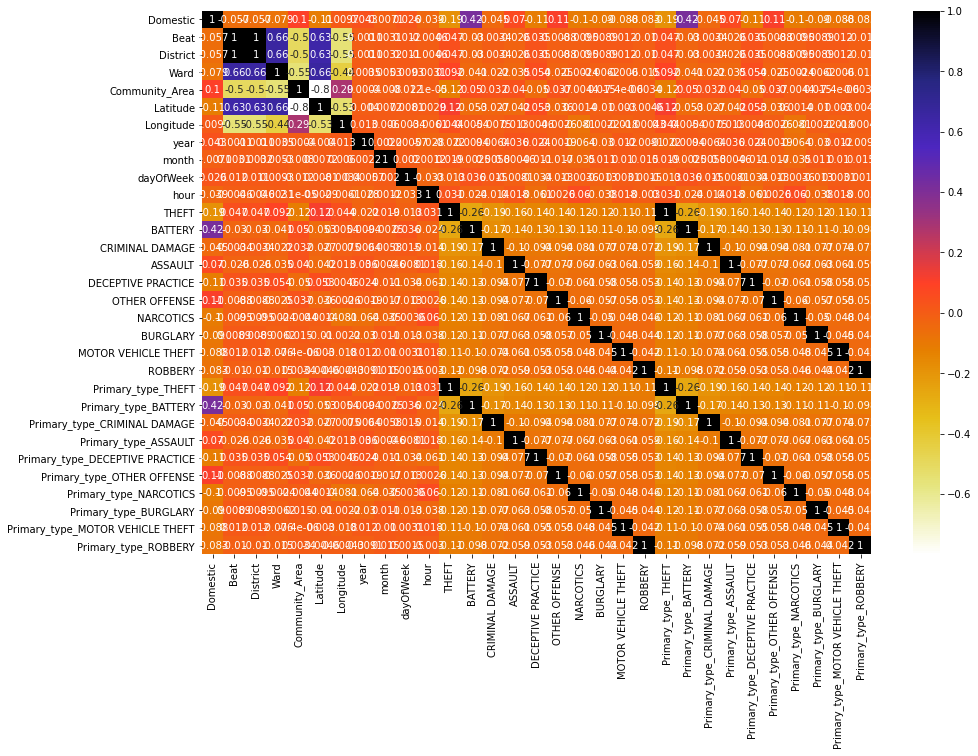

In [212]:
import seaborn as sns
plt.figure(figsize=(15,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [213]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [214]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

12

In [215]:
corr_features

{'District',
 'Latitude',
 'Primary_type_ASSAULT',
 'Primary_type_BATTERY',
 'Primary_type_BURGLARY',
 'Primary_type_CRIMINAL DAMAGE',
 'Primary_type_DECEPTIVE PRACTICE',
 'Primary_type_MOTOR VEHICLE THEFT',
 'Primary_type_NARCOTICS',
 'Primary_type_OTHER OFFENSE',
 'Primary_type_ROBBERY',
 'Primary_type_THEFT'}

In [216]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Domestic,Beat,Ward,Community_Area,Longitude,year,month,dayOfWeek,hour,THEFT,BATTERY,CRIMINAL DAMAGE,ASSAULT,DECEPTIVE PRACTICE,OTHER OFFENSE,NARCOTICS,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY
193390,0,414,8.0,43.0,-87.573651,2016,4,0,9,0,0,0,0,1,0,0,0,0,0
1558156,0,1912,47.0,5.0,-87.678760,2021,4,4,22,1,0,0,0,0,0,0,0,0,0
494234,1,612,17.0,71.0,-87.660320,2017,5,0,13,0,0,0,0,0,1,0,0,0,0
1151823,0,424,10.0,46.0,-87.545386,2015,6,0,15,1,0,0,0,0,0,0,0,0,0
25234,0,424,7.0,46.0,-87.545782,2015,10,1,8,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612715,0,2234,34.0,75.0,-87.657791,2017,9,3,13,0,0,1,0,0,0,0,0,0,0
154612,0,1613,41.0,10.0,-87.800284,2016,2,1,23,0,0,0,0,0,1,0,0,0,0
1678651,0,522,34.0,53.0,-87.634763,2021,9,1,13,0,0,0,0,0,1,0,0,0,0
119629,0,1031,22.0,30.0,-87.728076,2015,12,5,20,0,0,0,0,0,0,0,1,0,0


Text(0, 0.5, 'Frequency')

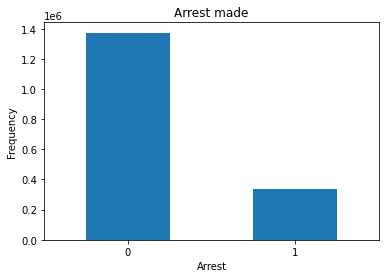

In [217]:
count_classes = pd.value_counts(a['Arrest'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Arrest made")

plt.xticks(range(2))

plt.xlabel("Arrest")

plt.ylabel("Frequency")

In [218]:
count_class_0, count_class_1 = a.Arrest.value_counts()

In [219]:
# Divide by class
df_class_0 = a[a['Arrest']== 0]
df_class_1 = a[a['Arrest'] == 1]

Random over-sampling:
0    1373134
1    1373134
Name: Arrest, dtype: int64


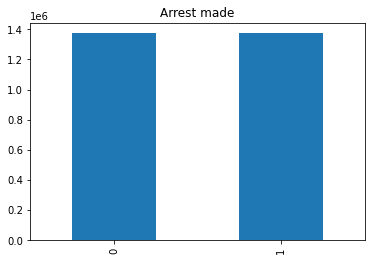

In [237]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Arrest.value_counts())

df_test_over.Arrest.value_counts().plot(kind='bar', title='Arrest made');

# Modelling

Logistic Regression Model

In [221]:
y = a['Arrest']
X = a.drop('Arrest',axis = 1)

In [222]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
a = scaler.fit_transform(X)
data_scaled = pd.DataFrame(a)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.179400,-0.311531,-0.313593,-0.793157,1.136241,-0.315890,-0.008883,-1.455005,0.718938,0.992548,...,-0.537815,2.052374,-0.355483,-0.291494,-0.2653,-0.26288,-0.228528,-0.217009,-0.208844,-0.201699
1,-0.458842,0.532054,0.549434,0.429997,-0.553034,0.614926,-1.679025,-1.455005,0.718938,0.491860,...,1.859374,-0.487241,-0.355483,-0.291494,-0.2653,-0.26288,-0.228528,-0.217009,-0.208844,-0.201699
2,-0.458842,0.389780,0.405596,0.861699,-0.740731,1.107616,-0.825567,-1.455005,0.718938,0.992548,...,-0.537815,-0.487241,-0.355483,-0.291494,-0.2653,-0.26288,4.375830,-0.217009,-0.208844,-0.201699
3,2.179400,0.547862,0.549434,0.358047,-0.553034,0.461538,-1.499070,-1.455005,0.718938,0.992548,...,-0.537815,-0.487241,-0.355483,3.430600,-0.2653,-0.26288,-0.228528,-0.217009,-0.208844,-0.201699
4,-0.458842,-0.757036,-0.745106,-0.145605,1.605484,-1.139324,0.193649,-1.455005,0.718938,0.992548,...,-0.537815,-0.487241,-0.355483,-0.291494,-0.2653,-0.26288,-0.228528,4.608097,-0.208844,-0.201699


In [224]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(X_train,y_train)

y_pred = log_model.predict(X_test)

C:\Users\KASHMIRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
print(f'Test accuracy: {log_model.score(X_test,y_test)}')
print(f'Train accuracy: {log_model.score(X_train,y_train)}')

Test accuracy: 0.8504117951461675
Train accuracy: 0.8498845890155641


C:\Users\KASHMIRA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


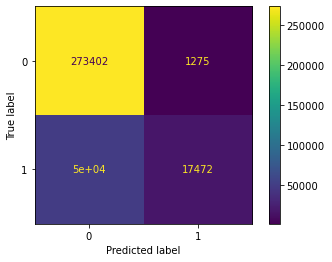

In [226]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_model, X_test, y_test)

In [227]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.91    274677
           1       0.93      0.26      0.41     67362

    accuracy                           0.85    342039
   macro avg       0.89      0.63      0.66    342039
weighted avg       0.86      0.85      0.81    342039



Decision Tree Model

In [228]:
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [230]:
model = dtc()
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

score= accuracy_score(y_test, pred_model)
score

0.8059314873450104

In [245]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_model))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88    274612
           1       0.51      0.54      0.52     67427

    accuracy                           0.81    342039
   macro avg       0.70      0.71      0.70    342039
weighted avg       0.81      0.81      0.81    342039



Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB
 
#Calling the Class
naive_bayes = GaussianNB()
 
#Fitting the data to the classifier
naive_bayes.fit(X_train , y_train)
 
#Predict on test data
y_predicted = naive_bayes.predict(X_test)

In [233]:
#Import metrics class from sklearn
from sklearn import metrics
 
metrics.accuracy_score(y_predicted , y_test)

0.754045591292221

In [246]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84    274612
           1       0.42      0.63      0.50     67427

    accuracy                           0.75    342039
   macro avg       0.66      0.71      0.67    342039
weighted avg       0.80      0.75      0.77    342039



# With balance data

In [235]:
y_b = df_test_over


In [236]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y_b,test_size=0.20,random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1710193, 2746268]

In [238]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
a = scaler.fit_transform(X)
data_scaled = pd.DataFrame(a)
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.179400,-0.311531,-0.313593,-0.793157,1.136241,-0.315890,-0.008883,-1.455005,0.718938,0.992548,...,-0.537815,2.052374,-0.355483,-0.291494,-0.2653,-0.26288,-0.228528,-0.217009,-0.208844,-0.201699
1,-0.458842,0.532054,0.549434,0.429997,-0.553034,0.614926,-1.679025,-1.455005,0.718938,0.491860,...,1.859374,-0.487241,-0.355483,-0.291494,-0.2653,-0.26288,-0.228528,-0.217009,-0.208844,-0.201699
2,-0.458842,0.389780,0.405596,0.861699,-0.740731,1.107616,-0.825567,-1.455005,0.718938,0.992548,...,-0.537815,-0.487241,-0.355483,-0.291494,-0.2653,-0.26288,4.375830,-0.217009,-0.208844,-0.201699
3,2.179400,0.547862,0.549434,0.358047,-0.553034,0.461538,-1.499070,-1.455005,0.718938,0.992548,...,-0.537815,-0.487241,-0.355483,3.430600,-0.2653,-0.26288,-0.228528,-0.217009,-0.208844,-0.201699
4,-0.458842,-0.757036,-0.745106,-0.145605,1.605484,-1.139324,0.193649,-1.455005,0.718938,0.992548,...,-0.537815,-0.487241,-0.355483,-0.291494,-0.2653,-0.26288,-0.228528,4.608097,-0.208844,-0.201699


In [239]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(X_train,y_train)

y_pred = log_model.predict(X_test)

C:\Users\KASHMIRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [240]:
print(f'Test accuracy: {log_model.score(X_test,y_test)}')
print(f'Train accuracy: {log_model.score(X_train,y_train)}')

Test accuracy: 0.8524320326044691
Train accuracy: 0.8523214491935849


C:\Users\KASHMIRA\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


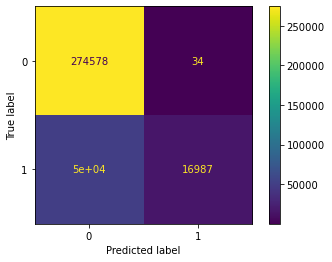

In [241]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_model, X_test, y_test)

In [242]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92    274612
           1       1.00      0.25      0.40     67427

    accuracy                           0.85    342039
   macro avg       0.92      0.63      0.66    342039
weighted avg       0.88      0.85      0.81    342039



Decision Tree

In [243]:
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y_b, test_size = 0.2, random_state = 0)


ValueError: Found input variables with inconsistent numbers of samples: [1710193, 2746268]

In [247]:
model = dtc()
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

score= accuracy_score(y_test, pred_model)
score

0.8057326796067115

In [248]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_model))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88    274612
           1       0.51      0.54      0.52     67427

    accuracy                           0.81    342039
   macro avg       0.70      0.71      0.70    342039
weighted avg       0.81      0.81      0.81    342039



Naive Bayes

In [249]:
from sklearn.naive_bayes import GaussianNB
 
#Calling the Class
naive_bayes = GaussianNB()
 
#Fitting the data to the classifier
naive_bayes.fit(X_train , y_train)
 
#Predict on test data
y_predicted = naive_bayes.predict(X_test)

In [250]:
#Import metrics class from sklearn
from sklearn import metrics
 
metrics.accuracy_score(y_predicted , y_test)

0.754045591292221

In [252]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84    274612
           1       0.42      0.63      0.50     67427

    accuracy                           0.75    342039
   macro avg       0.66      0.71      0.67    342039
weighted avg       0.80      0.75      0.77    342039

